In [144]:
# Importazione del df e dei moduli necessari

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import datetime as dt

In [159]:
df = pd.read_csv("songs_normalize.csv")
display(df)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [77]:
# Distribuzione del numero di canzoni presenti nel dataframe per ogni anno

tpy = df.groupby("year", as_index=False)["song"].count()  # Tracks Per Year
tpy = tpy.rename(columns={"song":"n_tracks"})
tpy

,year,n_tracks
0,1998,1
1,1999,38
2,2000,74
3,2001,108
4,2002,90
5,2003,97
6,2004,96
7,2005,104
8,2006,95
9,2007,94


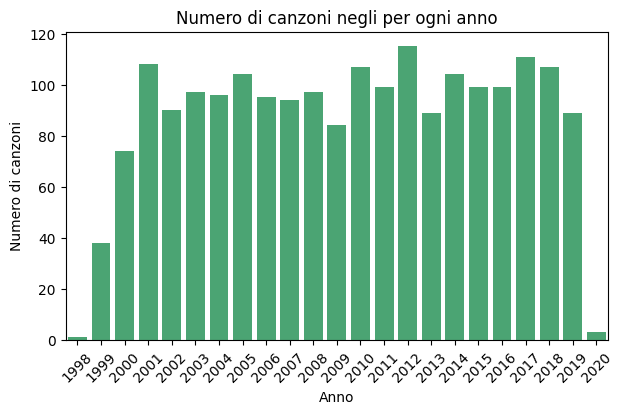

In [202]:
# Grafico distribuzione

plt.figure(figsize=(7,4))
plt.xticks(rotation=45)
plt.xlabel('Anno')
plt.ylabel('Numero di canzoni')
plt.title('Numero di canzoni negli per ogni anno')

sns.barplot(x='year', y='n_tracks', data=tpy, color="mediumseagreen")

plt.show()

In [204]:
# Durata media delle canzoni anno per anno, ordinate in ordine cresente

m = (df["year"] >= 2000) & (df["year"] <= 2019)
adpy = df[m].groupby("year", as_index=False).aggregate( {"duration_ms" : "mean"} ) # Average Duration Per Year

adpy

,year,duration_ms
0,2000,249993.067568
1,2001,242450.064815
2,2002,253549.077778
3,2003,236334.639175
4,2004,234039.843750
5,2005,236514.288462
6,2006,238148.400000
7,2007,231749.904255
8,2008,235675.247423
9,2009,236082.059524


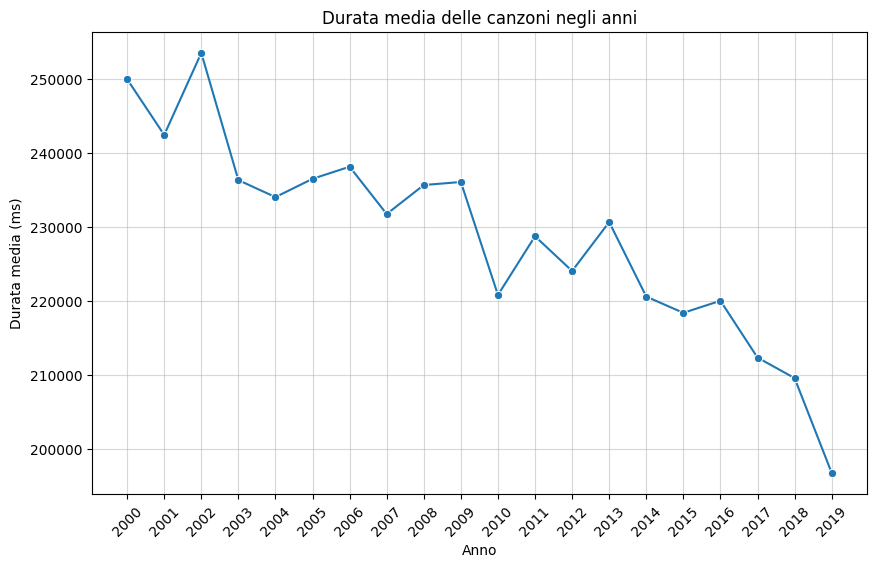

In [239]:
# Grafico dell'andamento della durata media delle canzoni negli anni
# Lineplot

plt.figure(figsize=(10,6))
plt.xticks(adpy["year"], rotation=45)

plt.title('Durata media delle canzoni negli anni')
plt.xlabel('Anno')
plt.ylabel('Durata media (ms)')
plt.grid(alpha=0.5)

g = sns.lineplot(x='year', y='duration_ms', data=adpy, marker='o')

plt.show()

<Figure size 1000x600 with 0 Axes>

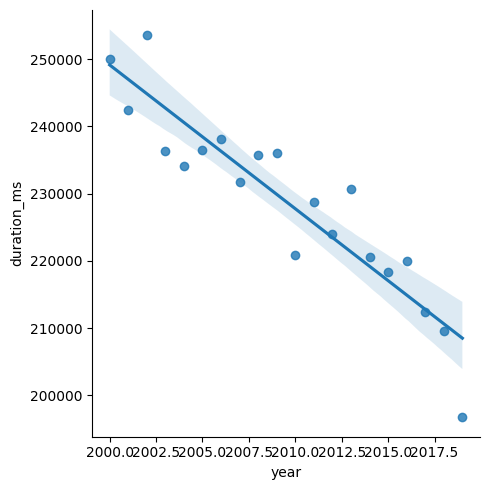

In [210]:
# Grafico dell'andamento della durata media delle canzoni negli anni
# lmplot

"""
plt.xticks(adpy["year"], rotation=45)
plt.title('Durata media delle canzoni negli anni')
plt.xlabel('Anno')
plt.ylabel('Durata media (ms)')
plt.grid(True)
"""

plt.figure(figsize=(10,6))
sns.lmplot(x='year', y='duration_ms', data=adpy)
plt.show()

In [205]:
atpy = df[m].groupby("year", as_index=False).aggregate( {"tempo" : "mean"} ) # Average Tempo Per Year
atpy

,year,tempo
0,2000,112.927041
1,2001,117.487074
2,2002,113.280911
3,2003,119.081402
4,2004,114.768479
5,2005,118.745683
6,2006,114.581337
7,2007,121.066968
8,2008,126.251567
9,2009,124.439369


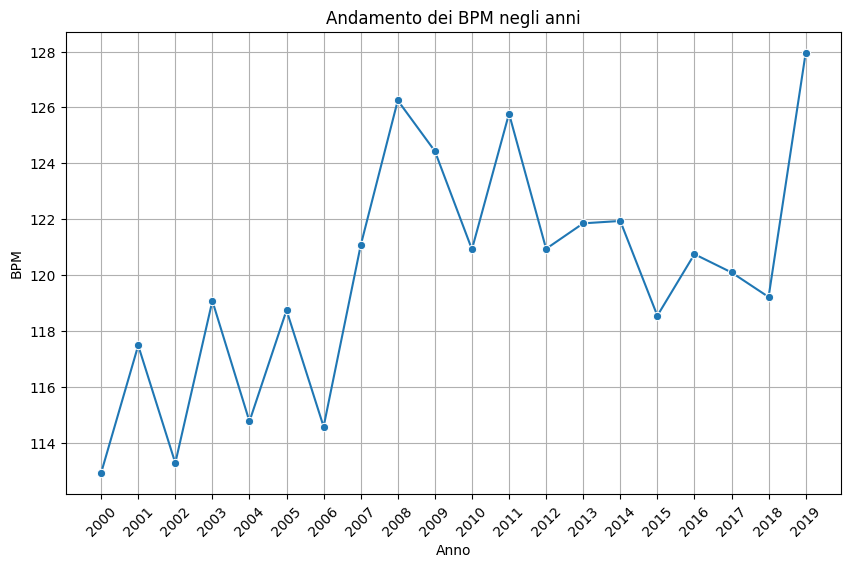

In [216]:
plt.figure(figsize=(10,6))

plt.xticks(adpy["year"], rotation=45)

plt.title('Andamento dei BPM negli anni')
plt.xlabel('Anno')
plt.ylabel('BPM')
plt.grid(True)

g = sns.lineplot(x='year', y='tempo', data=atpy, marker='o')

plt.show()

<Figure size 1000x600 with 0 Axes>

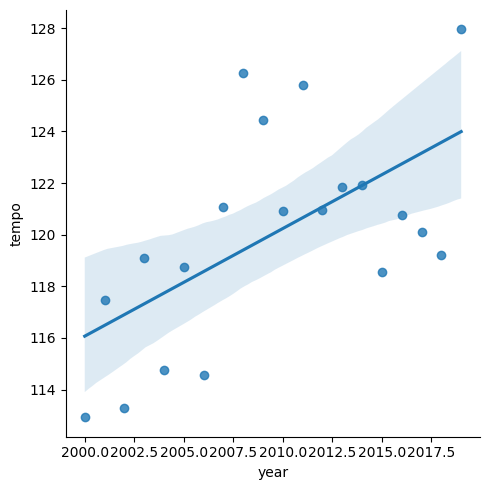

In [212]:
plt.figure(figsize=(10,6))
sns.lmplot(x='year', y='tempo', data=atpy)
plt.show()

In [214]:
avpy = df[m].groupby("year", as_index=False).aggregate( {"valence" : "mean"} ) # Average Valence Per Year
avpy

,year,valence
0,2000,0.647973
1,2001,0.661041
2,2002,0.575156
3,2003,0.607632
4,2004,0.608881
5,2005,0.553077
6,2006,0.601274
7,2007,0.559499
8,2008,0.548686
9,2009,0.568931


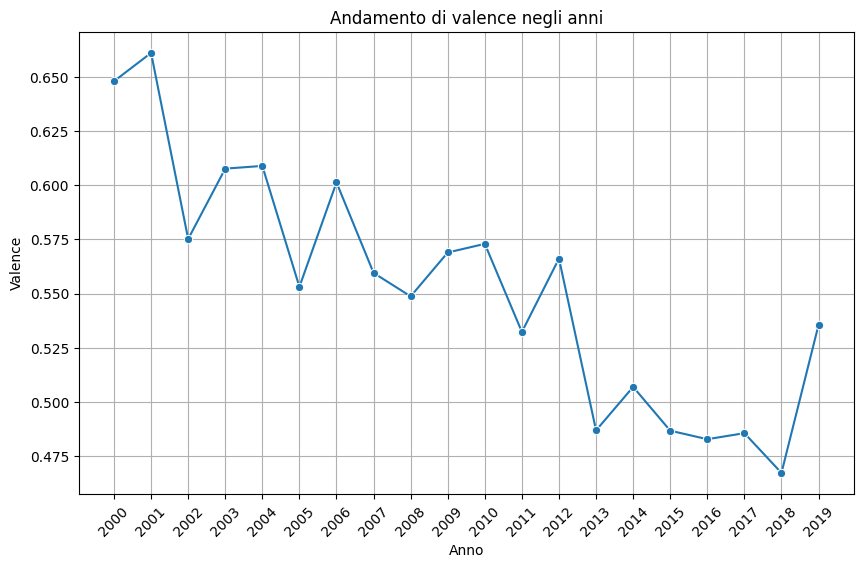

In [220]:
plt.figure(figsize=(10,6))

plt.xticks(adpy["year"], rotation=45)

plt.title('Andamento di valence negli anni')
plt.xlabel('Anno')
plt.ylabel('Valence')
plt.grid(True)

g = sns.lineplot(x='year', y='valence', data=avpy, marker='o')

plt.show()

<Figure size 1000x600 with 0 Axes>

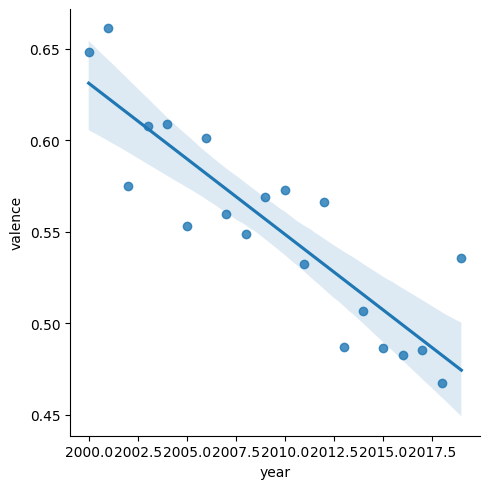

In [241]:
plt.figure(figsize=(10,6))
sns.lmplot(x='year', y='valence', data=avpy)
plt.show()

In [222]:
danceability_per_year = df[m].groupby("year", as_index=False).aggregate( {"danceability" : "mean"} ) # Average Duration Per Year
danceability_per_year

,year,danceability
0,2000,0.689824
1,2001,0.674130
2,2002,0.675244
3,2003,0.664876
4,2004,0.696833
5,2005,0.672923
6,2006,0.660863
7,2007,0.630521
8,2008,0.664186
9,2009,0.625167


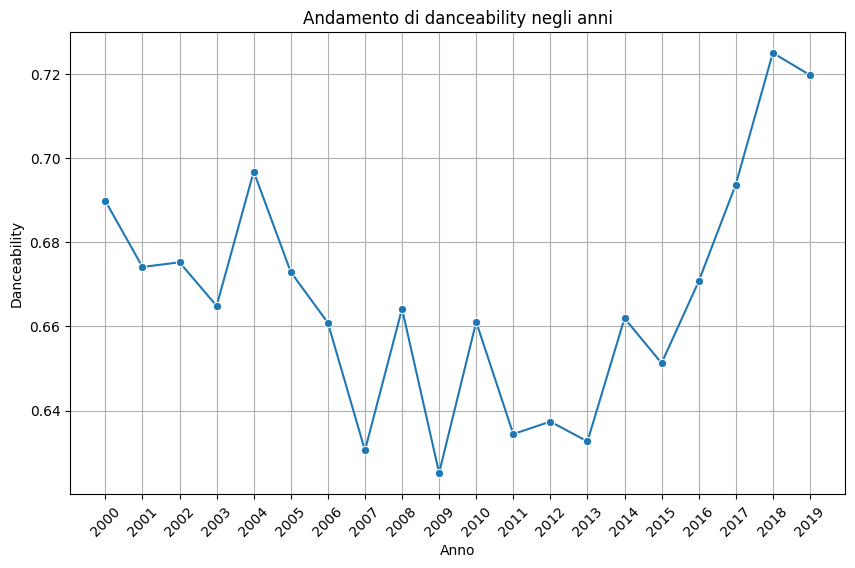

In [224]:
plt.figure(figsize=(10,6))

plt.xticks(adpy["year"], rotation=45)

plt.title('Andamento di danceability negli anni')
plt.xlabel('Anno')
plt.ylabel('Danceability')
plt.grid(True)

g = sns.lineplot(x='year', y='danceability', data=danceability_per_year, marker='o')

plt.show()

<Figure size 1000x600 with 0 Axes>

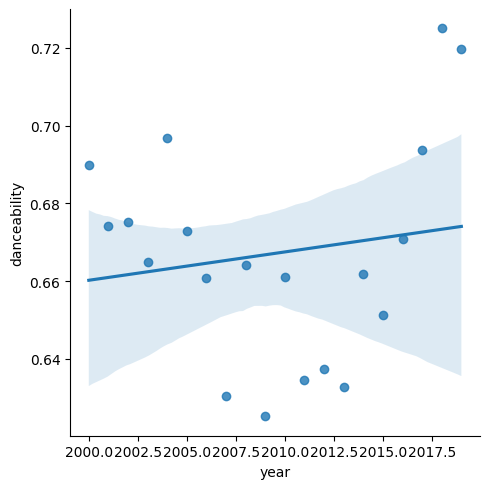

In [226]:
plt.figure(figsize=(10,6))
sns.lmplot(x='year', y='danceability', data=danceability_per_year)
plt.show()

In [230]:
aepy = df[m].groupby("year", as_index=False).aggregate( {"energy" : "mean"} ) # Average Duration Per Year
aepy

,year,energy
0,2000,0.748257
1,2001,0.724631
2,2002,0.722567
3,2003,0.701485
4,2004,0.734698
5,2005,0.701048
6,2006,0.705347
7,2007,0.767149
8,2008,0.752320
9,2009,0.754702


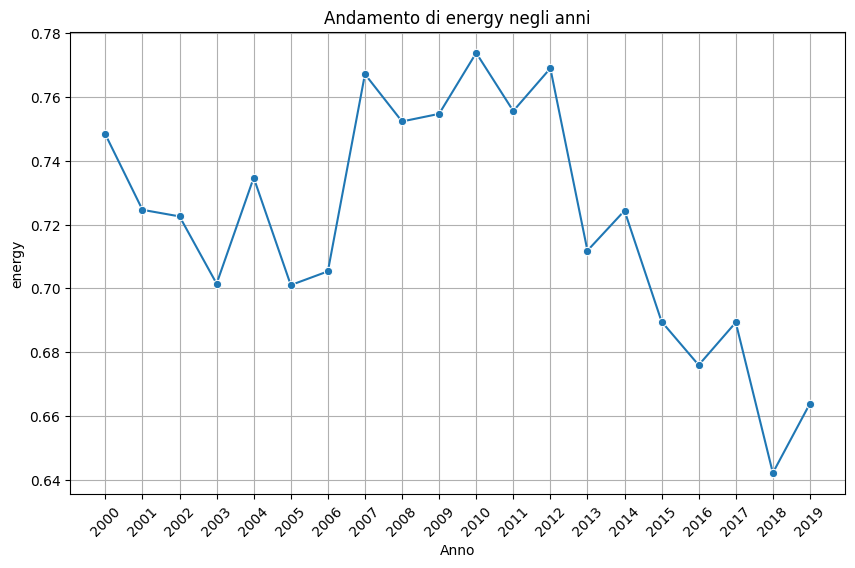

In [231]:
plt.figure(figsize=(10,6))

plt.xticks(adpy["year"], rotation=45)

plt.title('Andamento di energy negli anni')
plt.xlabel('Anno')
plt.ylabel('energy')
plt.grid(True)

g = sns.lineplot(x='year', y='energy', data=aepy, marker='o')

plt.show()

<Figure size 1000x600 with 0 Axes>

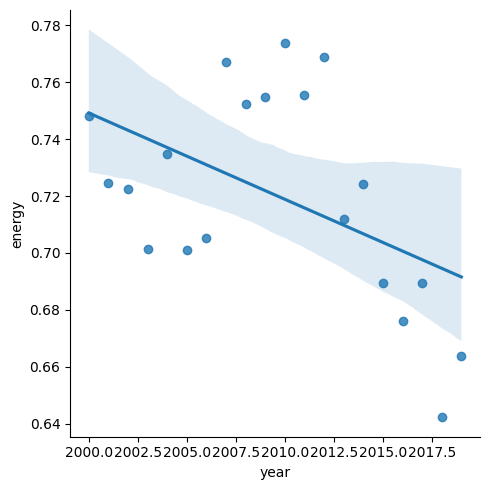

In [232]:
plt.figure(figsize=(10,6))
sns.lmplot(x='year', y='energy', data=aepy)
plt.show()